In [1]:
## Load packages 
#importing modules
import os
import pip

import numpy as np
%pip install mne
import mne # type: ignore

%pip install pandas
%pip install scikit-learn


import pandas as pd
import sklearn

import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from pathlib import Path
  
import os
import matplotlib.pyplot as plt
%matplotlib inline

/Applications/anaconda3/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load data 
# Define the subject and file path
eeg_subj = 'Group12_own' # this is mads I hope
path = "/Users/lina/Documents/GitHub/ore_EEG/data/"
data_raw_file = os.path.join(path, eeg_subj + '.vhdr')
raw = mne.io.read_raw_brainvision(data_raw_file, eog = ('HEOG', 'VEOG'), misc = ["41"])
raw.info['bads'] = []
raw.load_data()


# For the second one 
# Load data from fif file 
data_raw_file2 =os.path.join(path, "group12_own_AH-raw.fif")
raw2 = mne.io.read_raw_fif(data_raw_file2, preload=True)
raw2.load_data()
print(raw2.info['ch_names']) # seems like P09 and PO10 are replacements for HEOG and VEOG
channel_types = {
    '41': 'misc',     # Misc, the other two from above do not exist
    'PO9': 'eog',
    'PO10': 'eog',
}



Extracting parameters from /Users/lina/Documents/GitHub/ore_EEG/data/Group12_own.vhdr...
Setting channel info structure...


/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_36005/1595245220.py:6: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(data_raw_file, eog = ('HEOG', 'VEOG'), misc = ["41"])


Reading 0 ... 523239  =      0.000 ...   523.239 secs...
Opening raw data file /Users/lina/Documents/GitHub/ore_EEG/data/group12_own_AH-raw.fif...
    Range : 9000000 ... 9600000 =   9000.000 ...  9600.000 secs
Ready.
Reading 0 ... 600000  =      0.000 ...   600.000 secs...
['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10', '41']


### Setting montage

In [3]:
# selecting only EEG and stimulus data & plotting raw data
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, verbose=False)

# selecting only EEG and stimulus data & plotting raw data
montage2 = mne.channels.make_standard_montage('standard_1020')
raw2.set_montage(montage2, verbose=False)


<Raw | group12_own_AH-raw.fif, 33 x 600001 (600.0 s), ~151.1 MB, data loaded>

Using matplotlib as 2D backend.


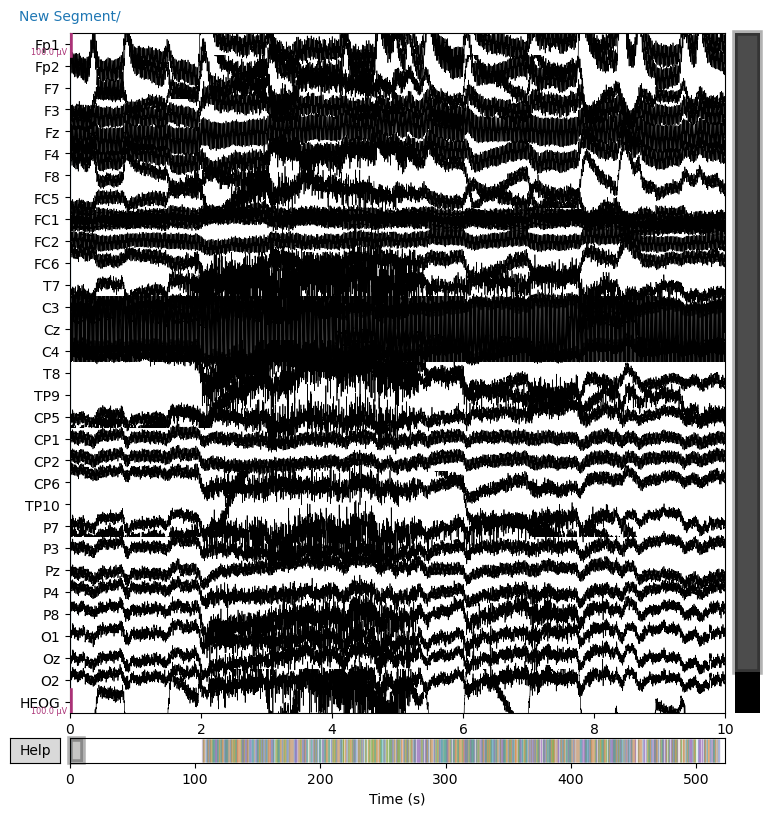

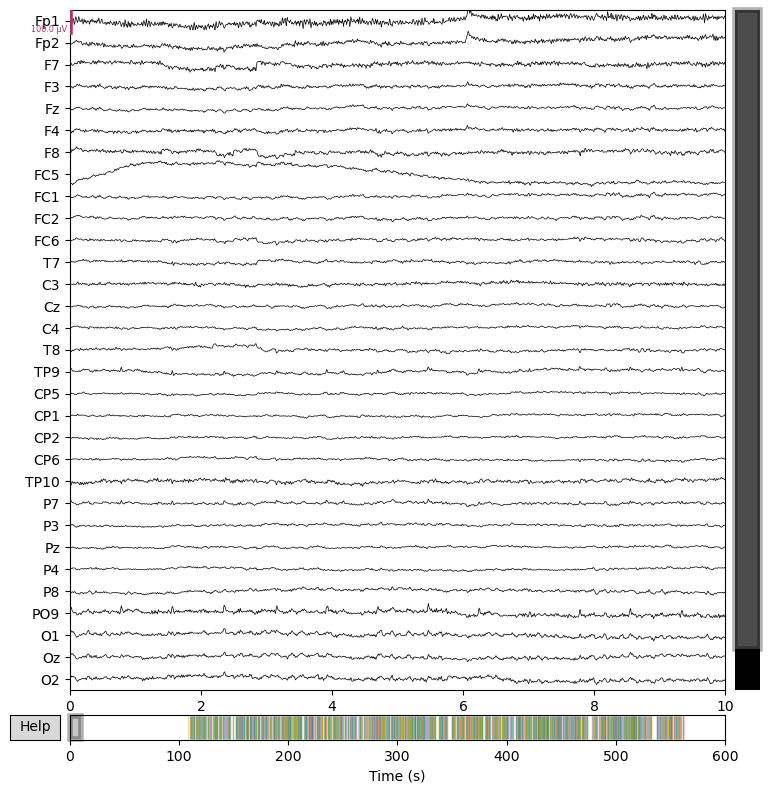

In [4]:
# Plot 
raw.plot(n_channels=31, scalings=50e-6);
raw2.plot(n_channels=31, scalings=50e-6);

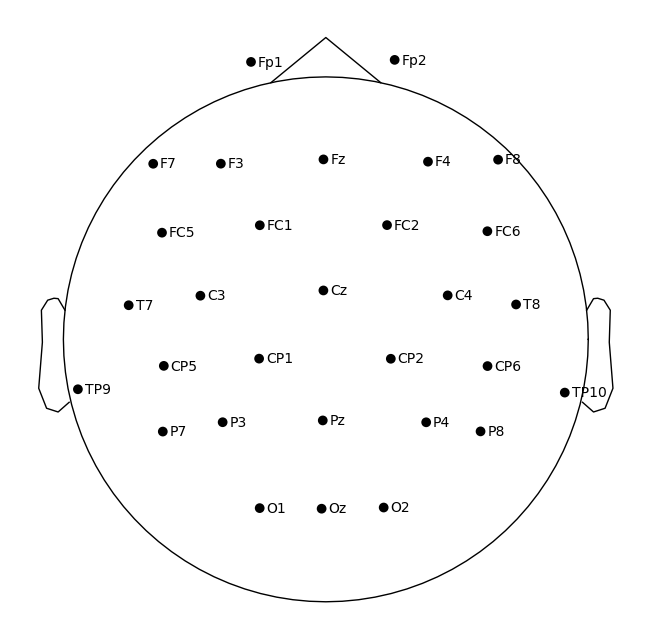

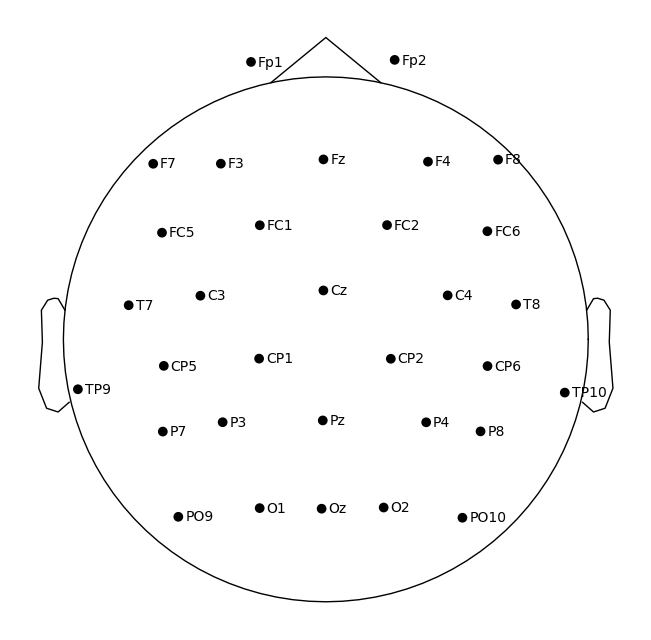

In [5]:
# remove bad channels 
### FIGURE OUT IF HEOG AND VEOG SHOULD BE REMOVED
mne.viz.plot_sensors(raw.info, kind='topomap', ch_type='eeg', show_names=True, title='EEG Sensor Locations');
raw.info["bads"] = ["Cz", "FC1", "41", "Fz"]

# For second data
mne.viz.plot_sensors(raw2.info, kind='topomap', ch_type='eeg', show_names=True, title='EEG Sensor Locations');
raw2.info["bads"] = [] 

### Common average

No projector specified for this dataset. Please consider the method self.add_proj.


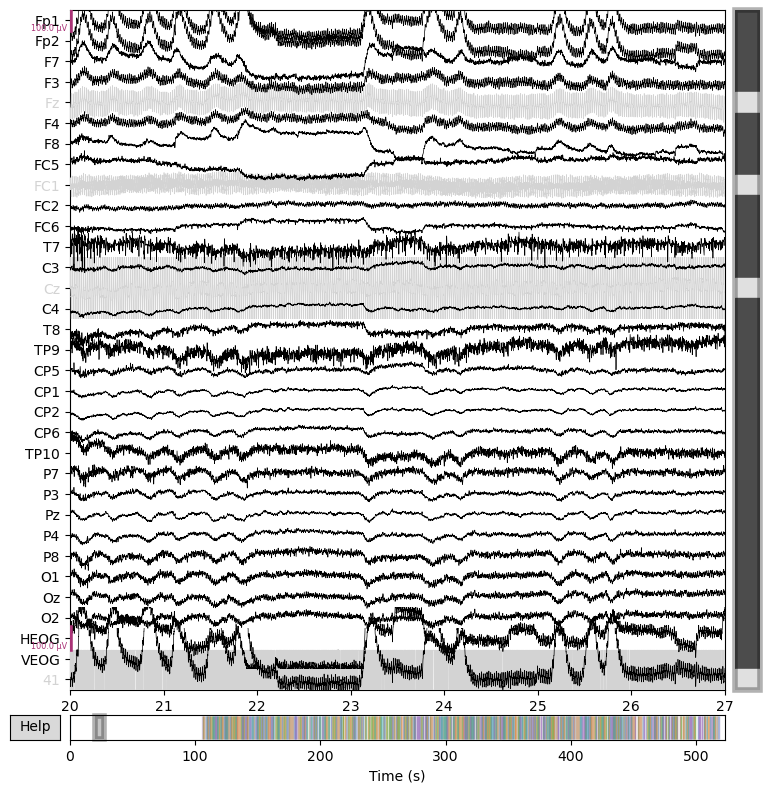

No projector specified for this dataset. Please consider the method self.add_proj.


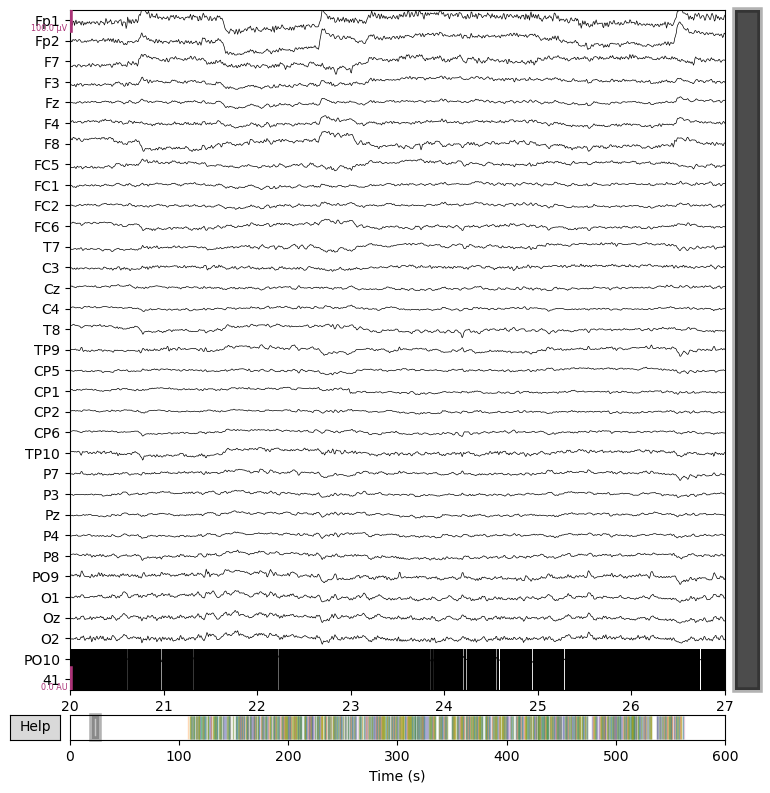

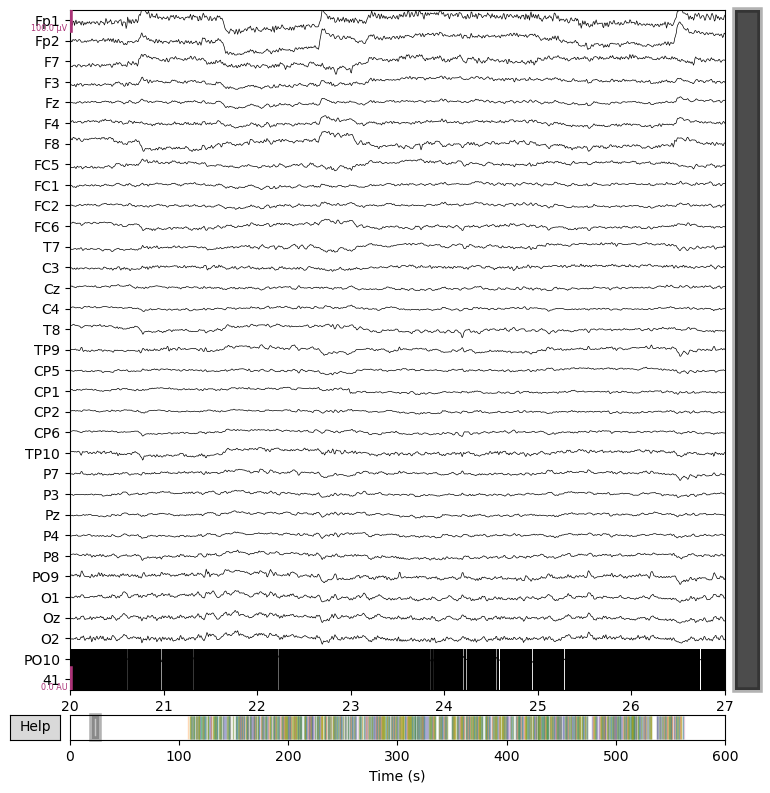

In [6]:
# Redefine the reference to a common average
raw.set_eeg_reference('average', projection=False, verbose=False)
raw.apply_proj()
raw.plot(n_channels=33, scalings=50e-6, duration = 7, start = 20)

# Redefine the reference to a common average
raw2.set_eeg_reference('average', projection=False, verbose=False)
raw2.apply_proj()
raw2.plot(n_channels=33, scalings=50e-6, duration = 7, start = 20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.0s finished


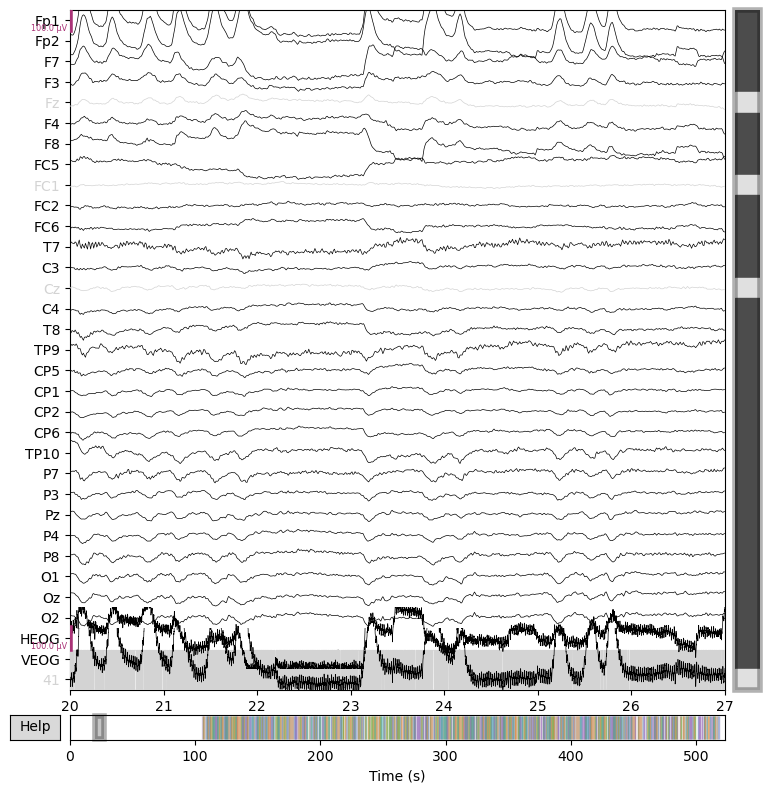

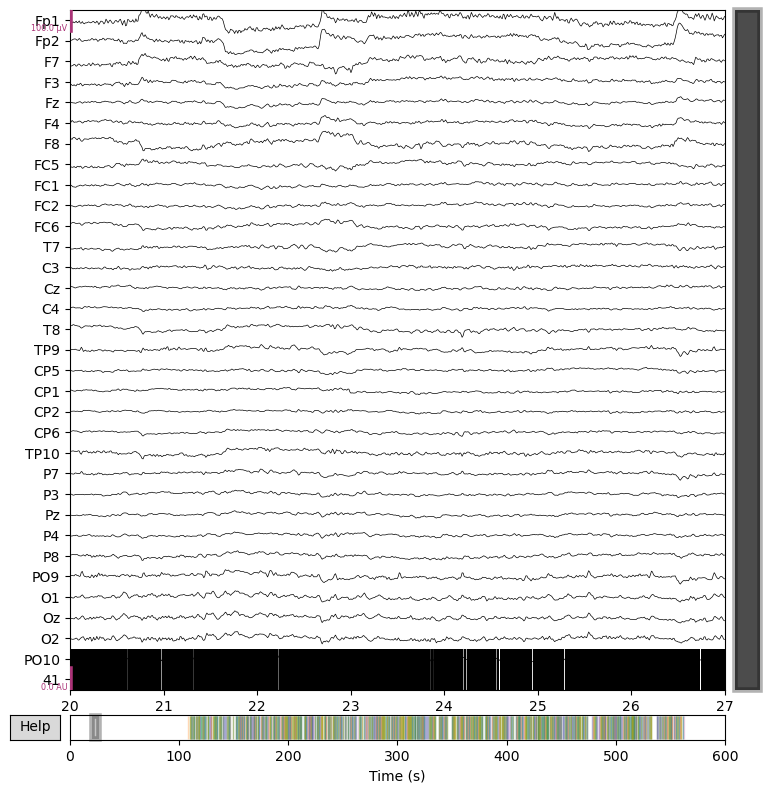

In [7]:
# Filter the data 
raw.filter(l_freq = 0.1, h_freq = 30) # 0.1 -30 is the convention, thats why we have specified these filters
raw2.filter(l_freq = 0.1, h_freq = 30)
raw.plot(n_channels=33, scalings=50e-6, duration = 7, start = 20);
raw2.plot(n_channels=33, scalings=50e-6, duration = 7, start = 20);

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Fitting ICA to data using 27 channels (please be patient, this may take a while)
Selecting by explained variance: 7 components
Fitting ICA took 5.1s.


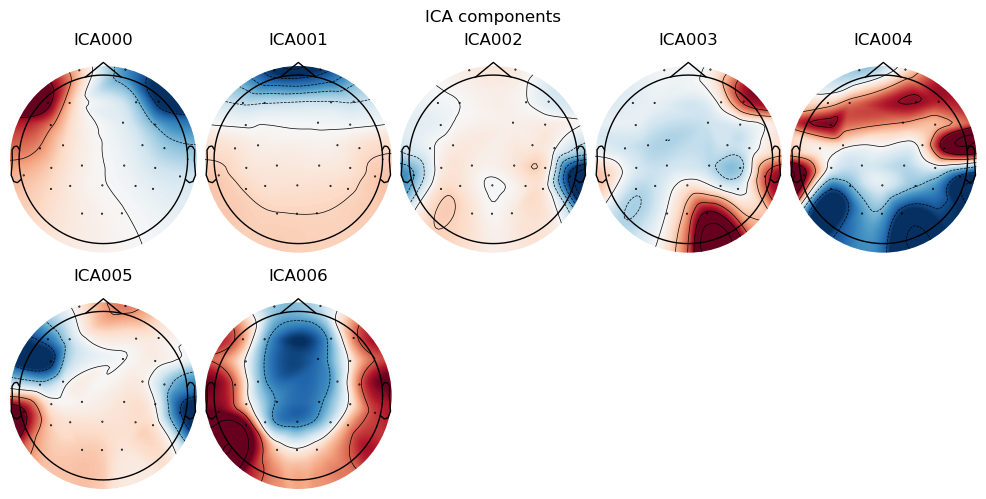

Creating RawArray with float64 data, n_channels=7, n_times=523240
    Range : 0 ... 523239 =      0.000 ...   523.239 secs
Ready.


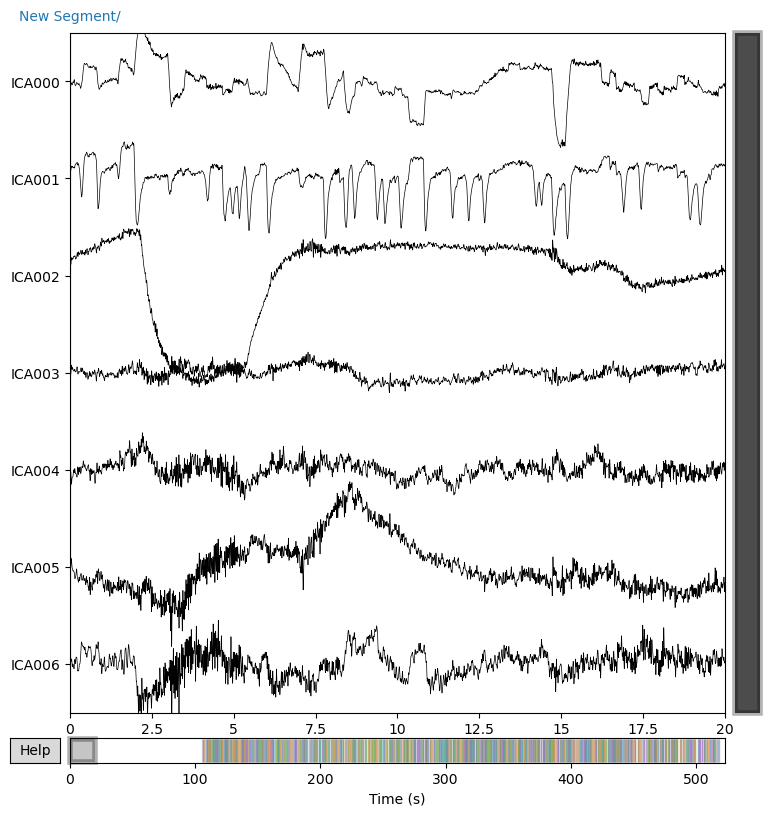

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
261 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
261 matching events found
No baseline correction applied
0 projection items activated


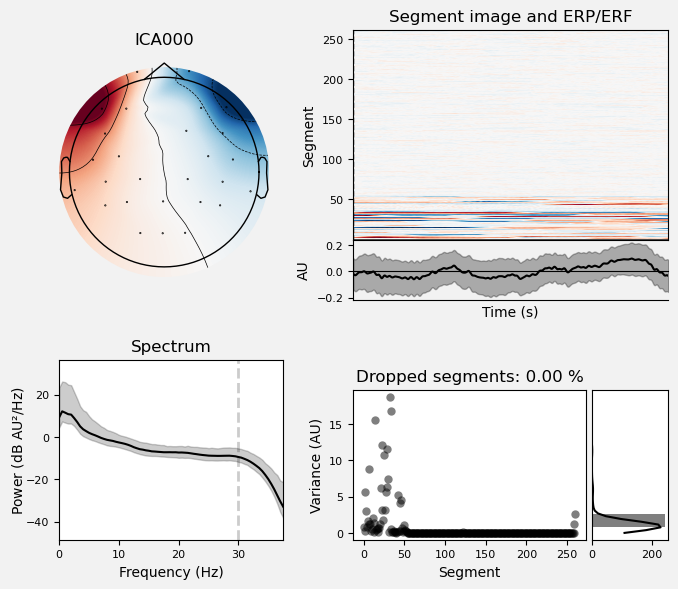

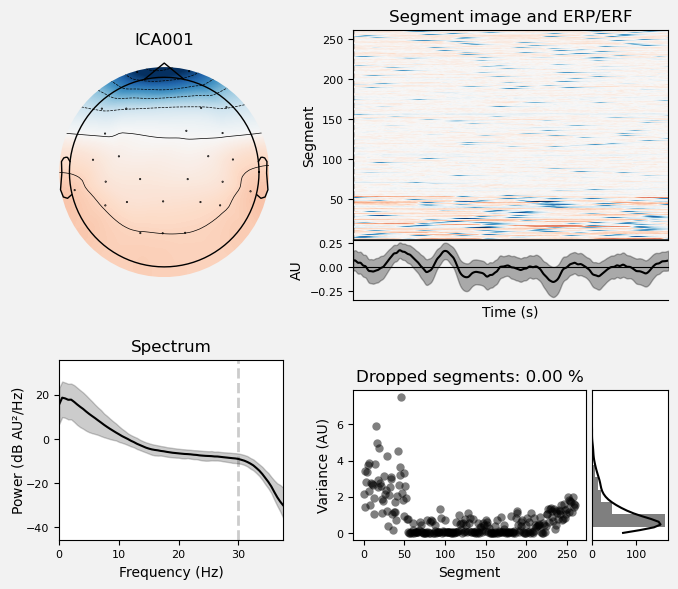

Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 27 PCA components


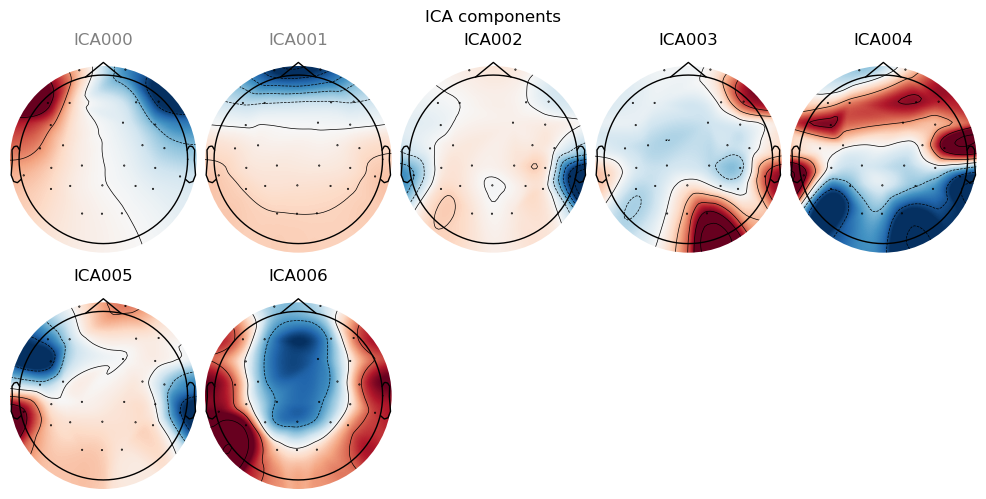

Creating RawArray with float64 data, n_channels=7, n_times=523240
    Range : 0 ... 523239 =      0.000 ...   523.239 secs
Ready.


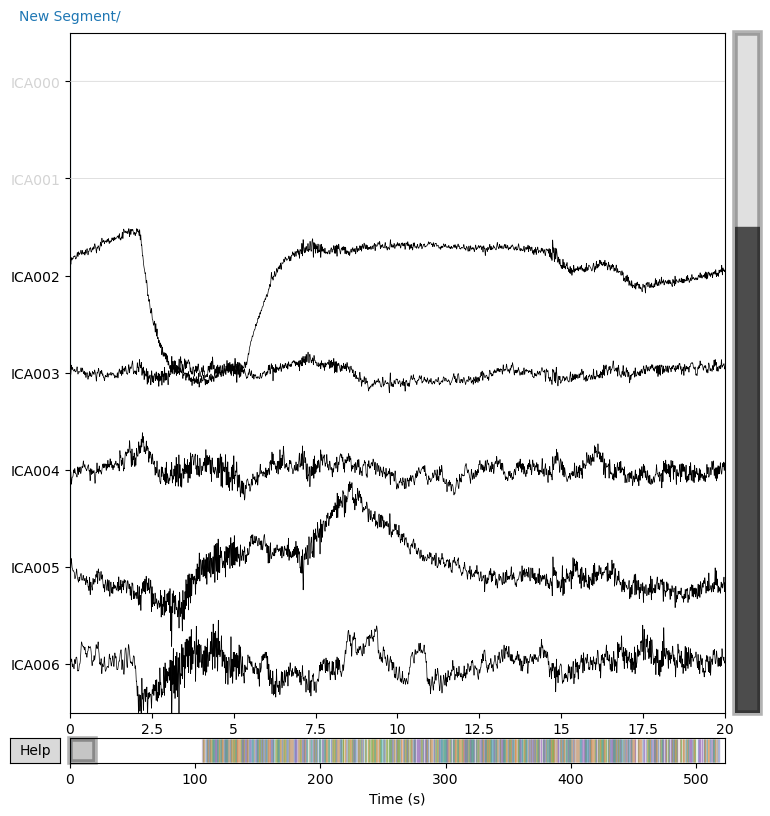

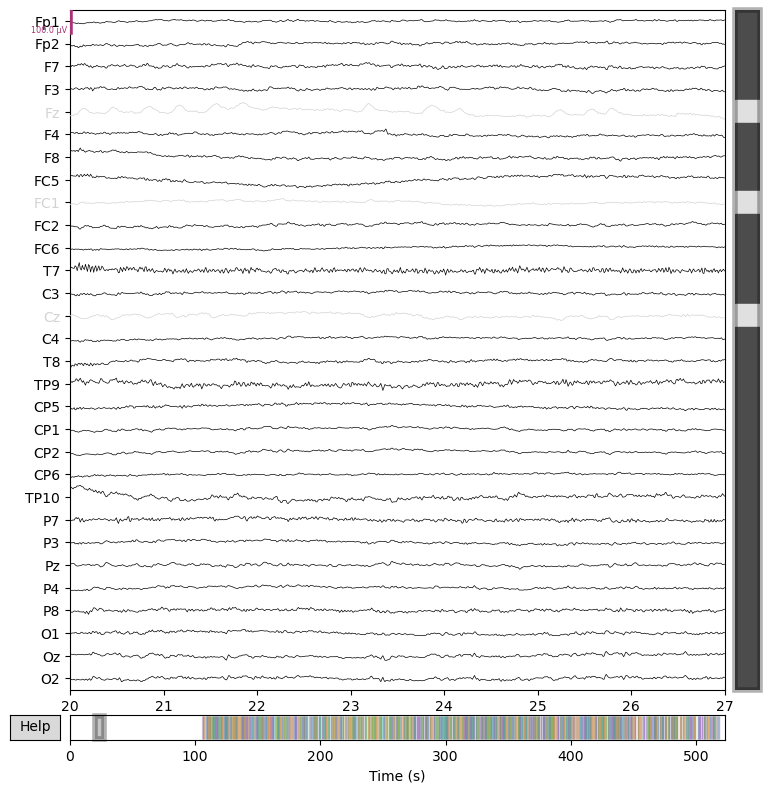

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by explained variance: 16 components
Fitting ICA took 12.7s.


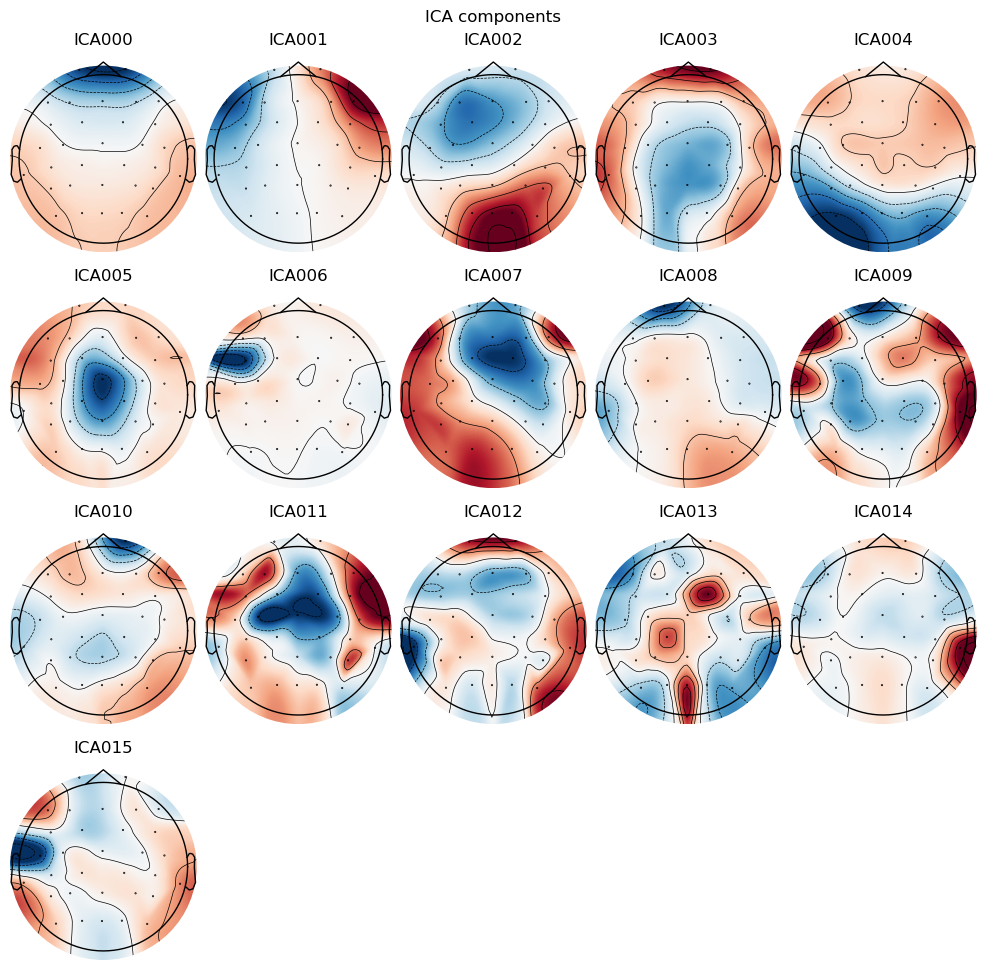

Creating RawArray with float64 data, n_channels=16, n_times=600001
    Range : 9000000 ... 9600000 =   9000.000 ...  9600.000 secs
Ready.


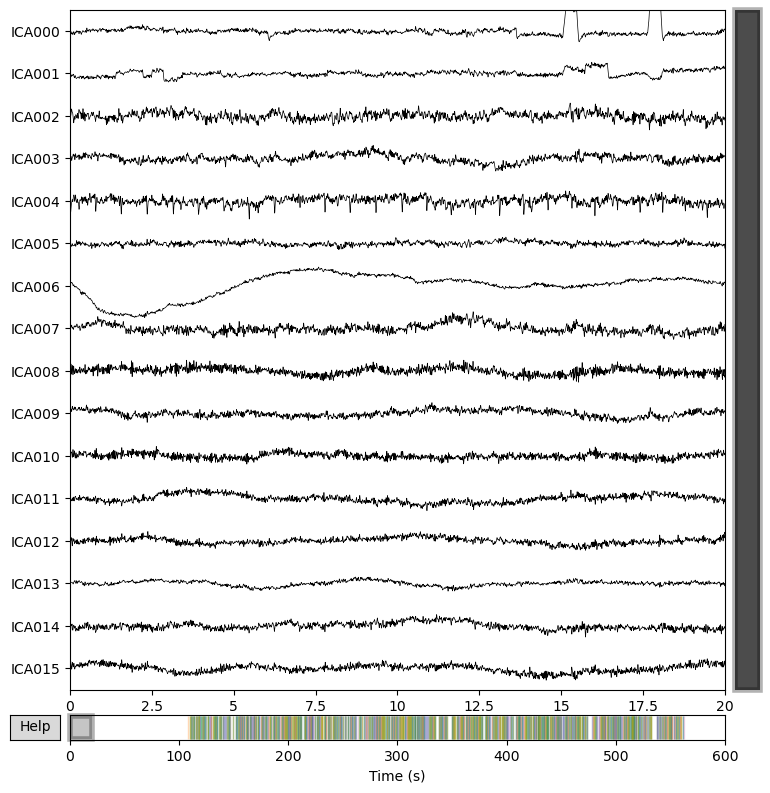

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated


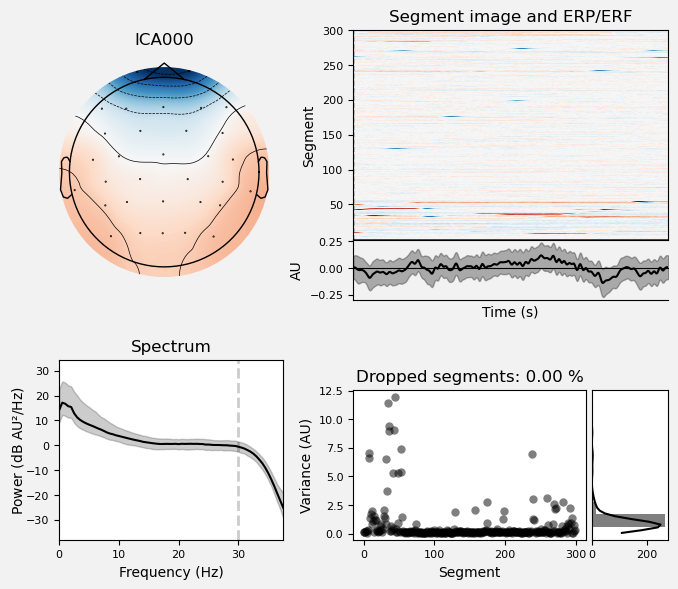

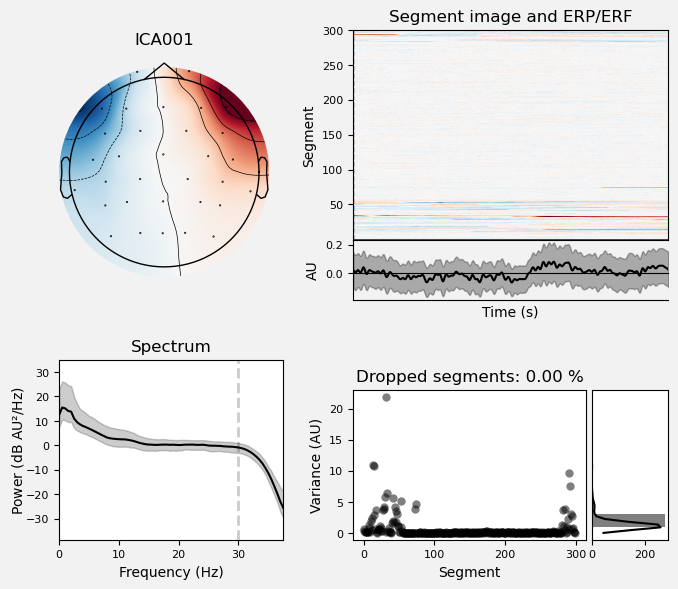

Applying ICA to Raw instance
    Transforming to ICA space (16 components)
    Zeroing out 2 ICA components
    Projecting back using 32 PCA components


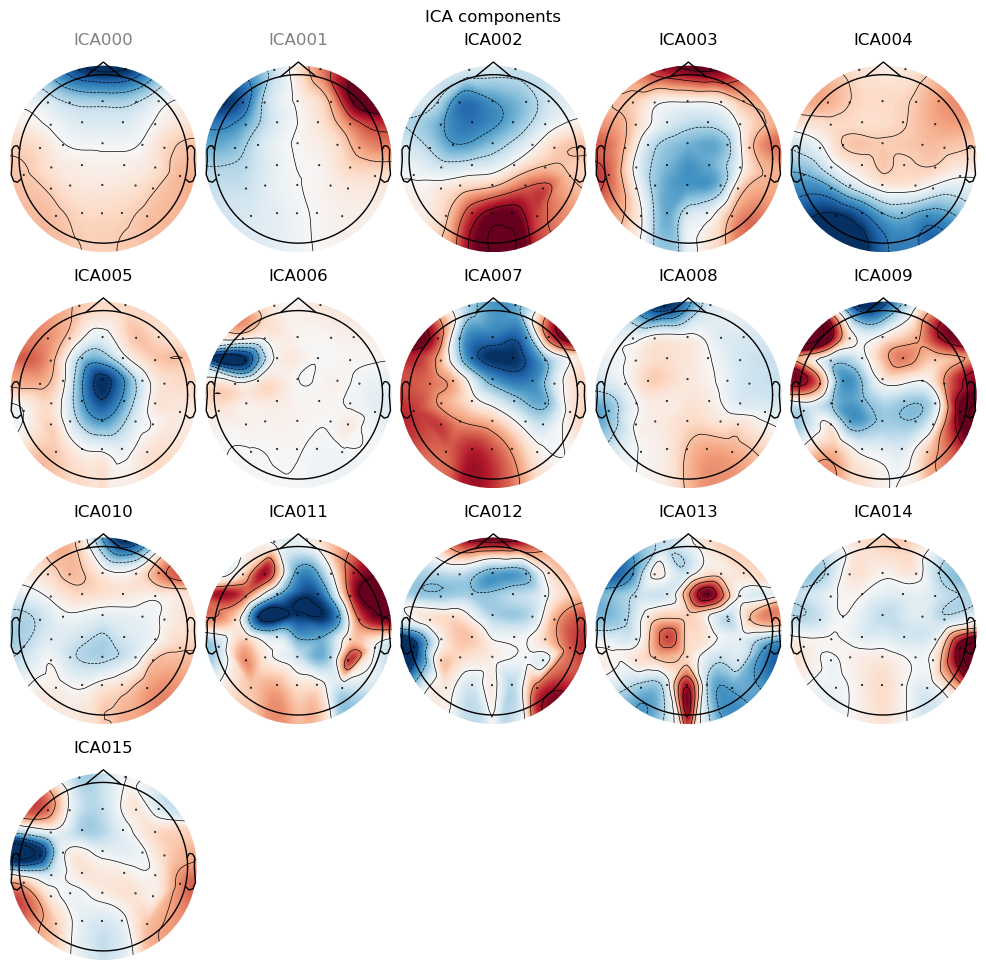

Creating RawArray with float64 data, n_channels=16, n_times=600001
    Range : 9000000 ... 9600000 =   9000.000 ...  9600.000 secs
Ready.


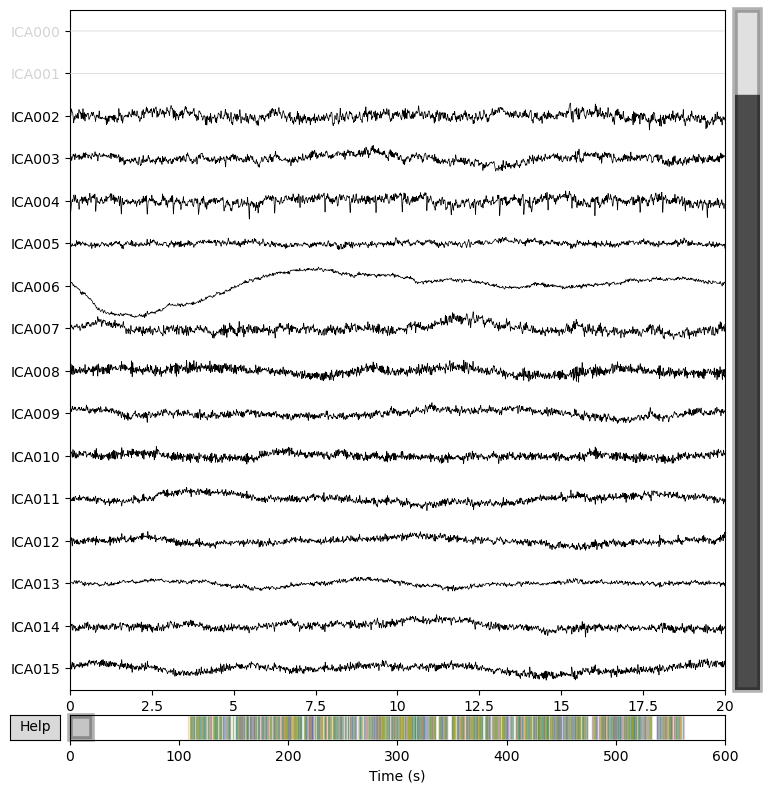

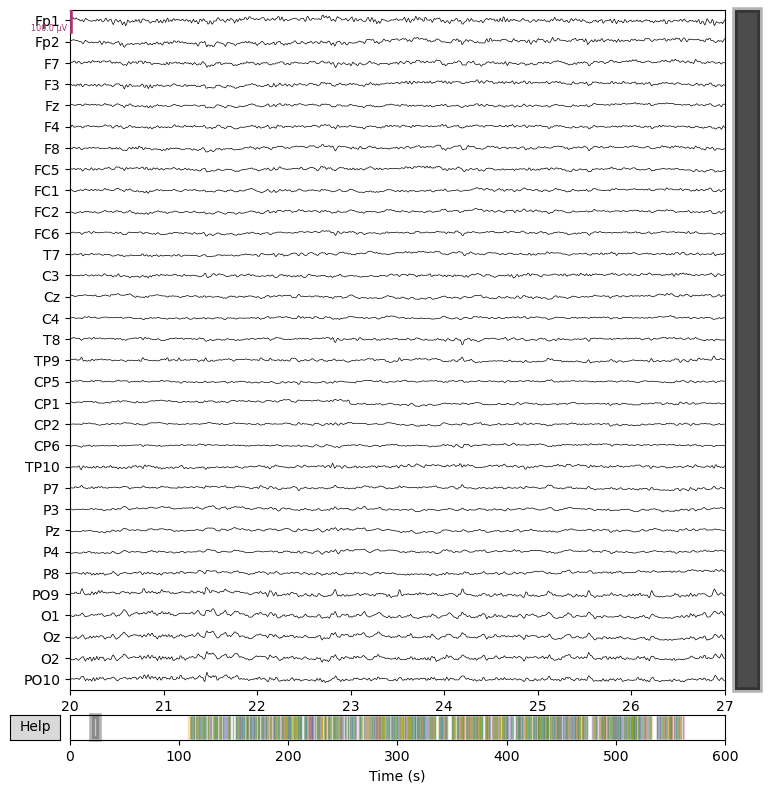

In [8]:
import mne
import sklearn  # scikit-learn is needed to run ICA (Independent Component Analysis)

raw.pick_types(meg=False, eeg=True, stim=True, exclude=[])
ica = mne.preprocessing.ICA(n_components=0.95, max_iter=800, random_state=7)

ica.fit(raw)
# plotting the model
ica.plot_components();
ica.plot_sources(raw)
ica.plot_properties(raw, picks=[0, 1])
# excluding the eyes
ica.exclude = [0,1]
ica.apply(raw)
# Plot again after applying ICA
ica.plot_components()
ica.plot_sources(raw)
raw.plot(n_channels=33, scalings=50e-6, duration = 7, start = 20);

# same for second 

raw2.pick_types(meg=False, eeg=True, stim=True, exclude=[])
ica2 = mne.preprocessing.ICA(n_components=0.95, max_iter=800, random_state=7)

ica2.fit(raw2)
# plotting the model
ica2.plot_components();
ica2.plot_sources(raw2)
ica2.plot_properties(raw2, picks=[0, 1])
# excluding the eyes
ica2.exclude = [0,1]
ica2.apply(raw2)
# Plot again after applying ICA
ica2.plot_components()
ica2.plot_sources(raw2)
raw2.plot(n_channels=33, scalings=50e-6, duration = 7, start = 20);

### Events for fixing the data/triggers

In [11]:
## epoching data 
events, _ = mne.events_from_annotations(raw)  # Extract events from annotations

## epoching data 
events2, _ = mne.events_from_annotations(raw2)  # Extract events from annotations

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 40', 'Stimulus/S 50', 'Stimulus/S 54', 'Stimulus/S 58', 'Stimulus/S 62', 'Stimulus/S130', 'Stimulus/S140', 'Stimulus/S150', 'Stimulus/S156', 'Stimulus/S158', 'Stimulus/S170', 'Stimulus/S172', 'Stimulus/S220', 'Stimulus/S222', 'Stimulus/S252']
Non-RawBrainVision raw using branvision markers
Used Annotations descriptions: ['Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 40', 'Stimulus/S 50', 'Stimulus/S 54', 'Stimulus/S 58', 'Stimulus/S 62', 'Stimulus/S130', 'Stimulus/S140', 'Stimulus/S150', 'Stimulus/S156', 'Stimulus/S158', 'Stimulus/S170', 'Stimulus/S172', 'Stimulus/S220', 'Stimulus/S222', 'Stimulus/S252']


In [12]:
import pandas as pd

# import data
behav_data = pd.read_csv("/Users/lina/Documents/GitHub/ore_EEG/data/cleaned_logfile_sub1.csv")
# Convert all values to lowercase in the 'gender' column
behav_data['gender'] = behav_data['gender'].str.lower() # mads

# Replace 'female' with 'male' in the 'gender' column
behav_data['gender'] = behav_data['gender'].replace('female', 'male') # mads

# Check if the image filename contains a capital 'A', and if so, change the 'img_ethnicity' column to 'asian'
behav_data.loc[behav_data['i'].str.contains('A'), 'img_ethnicity'] = 'asian'

# Add a new column to the DataFrame
behav_data['ethnicity_trigger'] = ""

# Assign trigger values in the new column
for index, row in behav_data.iterrows():
    emotion = row["img_emotion"]  # Accessing value in the 'img_emotion' column of the current row
    ethnicity = row["img_ethnicity"]  # Accessing value in the 'img_ethnicity' column of the current row

    if emotion == "neutral":
        if ethnicity == "asian":
            behav_data.at[index, "ethnicity_trigger"] = 41 # asian/neutral
        elif ethnicity == "black":
            behav_data.at[index, "ethnicity_trigger"] = 42 # black/neutral
        else:
            behav_data.at[index, "ethnicity_trigger"] = 43  # white/neutral

    elif emotion == "happy": 
        if ethnicity == "asian":
            behav_data.at[index, "ethnicity_trigger"] = 21  # asian/happy
        elif ethnicity == "black":
            behav_data.at[index, "ethnicity_trigger"] = 22  # black/happy
        else:
            behav_data.at[index, "ethnicity_trigger"] = 23  # white/happy

    else:  # Assuming 'sad' emotion
        if ethnicity == "asian":
            behav_data.at[index, "ethnicity_trigger"] = 31  # asian/sad
        elif ethnicity == "black":
            behav_data.at[index, "ethnicity_trigger"] = 32  # black/sad
        else:
            behav_data.at[index, "ethnicity_trigger"] = 33  # white/sad

# Save the modified DataFrame back to the same file
behav_data.to_csv("/Users/lina/Documents/GitHub/ore_EEG/data/cleaned_logfile_sub1.csv", index=False)

# Import new data
behav_data_new = pd.read_csv("/Users/lina/Documents/GitHub/ore_EEG/data/cleaned_logfile_sub1.csv")

counter = 0
for event in events:
    if event[-1] in [20, 30, 40]:

        # Get the corresponding event from the behavioral data
        behav_event = behav_data_new.iloc[counter]
        counter += 1

        # Extract relevant information from the behav_event
        ethnicity_trigger = behav_event["ethnicity_trigger"]
        
        # Assign event numbers based on the ethnicity_trigger value
        event[-1] = ethnicity_trigger

for event in events: 
    print(event[-1])

## ASSIGN IDs
event_id = {
    'neutral/black': 42,
    'neutral/white': 43,
    'happy/asian': 21,
    'happy/black': 22,
    'happy/white': 23,
    'sad/asian': 31,
    'sad/black': 32,
    'sad/white': 33,
    'incorrect': 50,
    'sadcorrect/response': 130,
    'neutral/response': 140,
    'happycorrect/response': 220
}

99999
42
172
140
156
22
220
22
220
252
42
172
140
158
32
158
130
150
21
220
252
43
172
140
156
22
220
21
220
222
33
158
130
158
33
158
130
32
158
130
170
42
172
140
172
43
172
140
158
33
158
130
32
158
130
150
23
220
33
158
130
158
33
158
130
150
23
220
21
220
252
43
172
140
158
32
158
130
158
33
158
130
158
31
158
130
22
220
22
220
252
42
172
140
156
21
220
21
220
222
31
158
130
150
21
220
222
31
158
130
158
32
62
50
54
22
220
23
220
21
220
21
220
222
31
158
130
170
43
172
140
158
32
158
130
150
21
220
252
43
172
140
172
42
172
140
156
22
220
21
220
252
42
172
140
42
172
140
31
158
130
32
158
130
21
220
252
43
172
140
42
172
140
158
33
158
130
32
158
130
150
22
220
222
33
158
130
42
172
140
156
23
220
252
43
172
140
156
22
220
252
42
140
158
32
158
130
150
22
220
23
54
50
54
22
220
252
43
172
140
43
172
140
158
33
130
23
220
222
32
62
50
31
158
130
158
32
130
158
31
130
150
21
220
22
220
252
42
140
22
220
222
33
130
150
21
220
31
158
130
43
172
140
156
23
220
23
220
22
220
21
220
21
2

In [13]:
# SAME FOR SECOND DATA

# import data
behav_data = pd.read_csv("/Users/lina/Documents/GitHub/ore_EEG/data/cleaned_logfile_ah.csv")
# Convert all values to lowercase in the 'gender' column
behav_data['gender'] = behav_data['gender'].str.lower() # mads

# Replace 'female' with 'male' in the 'gender' column
behav_data['gender'] = behav_data['gender'].replace('female', 'male') # mads

# Check if the image filename contains a capital 'A', and if so, change the 'img_ethnicity' column to 'asian'
behav_data.loc[behav_data['i'].str.contains('A'), 'img_ethnicity'] = 'asian'

# Add a new column to the DataFrame
behav_data['ethnicity_trigger'] = ""

# Assign trigger values in the new column
for index, row in behav_data.iterrows():
    emotion = row["img_emotion"]  # Accessing value in the 'img_emotion' column of the current row
    ethnicity = row["img_ethnicity"]  # Accessing value in the 'img_ethnicity' column of the current row

    if emotion == "neutral":
        if ethnicity == "asian":
            behav_data.at[index, "ethnicity_trigger"] = 41 # asian/neutral
        elif ethnicity == "black":
            behav_data.at[index, "ethnicity_trigger"] = 42 # black/neutral
        else:
            behav_data.at[index, "ethnicity_trigger"] = 43  # white/neutral

    elif emotion == "happy": 
        if ethnicity == "asian":
            behav_data.at[index, "ethnicity_trigger"] = 21  # asian/happy
        elif ethnicity == "black":
            behav_data.at[index, "ethnicity_trigger"] = 22  # black/happy
        else:
            behav_data.at[index, "ethnicity_trigger"] = 23  # white/happy

    else:  # Assuming 'sad' emotion
        if ethnicity == "asian":
            behav_data.at[index, "ethnicity_trigger"] = 31  # asian/sad
        elif ethnicity == "black":
            behav_data.at[index, "ethnicity_trigger"] = 32  # black/sad
        else:
            behav_data.at[index, "ethnicity_trigger"] = 33  # white/sad

# Save the modified DataFrame back to the same file
behav_data.to_csv("/Users/lina/Documents/GitHub/ore_EEG/data/cleaned_logfile_ah.csv", index=False)

# Import new data
behav_data_new = pd.read_csv("/Users/lina/Documents/GitHub/ore_EEG/data/cleaned_logfile_ah.csv")

counter = 0
for event in events2:
    if event[-1] in [20, 30, 40]:

        # Get the corresponding event from the behavioral data
        behav_event = behav_data_new.iloc[counter]
        counter += 1

        # Extract relevant information from the behav_event
        ethnicity_trigger = behav_event["ethnicity_trigger"]
        
        # Assign event numbers based on the ethnicity_trigger value
        event[-1] = ethnicity_trigger

for event in events2: 
    print(event[-1])

### ASSIGN IDS

event_id2 = {
    'neutral/black': 42,
    'neutral/white': 43,
    'happy/asian': 21,
    'happy/black': 22,
    'happy/white': 23,
    'sad/asian': 31,
    'sad/black': 32,
    'sad/white': 33,
    'incorrect': 50,
    'sadcorrect/response': 130,
    'neutral/response': 140,
    'happycorrect/response': 220
}

33
130
158
32
158
130
170
42
140
156
22
220
252
43
172
140
172
43
172
140
158
31
130
170
43
172
140
32
158
130
158
33
158
130
150
22
220
252
42
140
172
42
172
140
158
32
158
130
170
43
172
140
21
220
42
172
140
158
33
158
130
23
220
22
220
21
220
222
32
158
130
32
158
130
43
172
140
172
43
172
140
158
32
158
130
150
23
220
252
43
172
140
158
32
158
130
170
43
172
140
156
22
220
21
220
23
220
22
220
252
42
140
158
32
158
130
170
42
172
140
156
22
220
252
42
172
140
172
43
172
140
22
220
252
42
172
140
158
33
158
130
150
21
220
23
220
222
33
158
130
150
22
220
222
31
158
130
150
22
220
32
158
130
158
31
158
130
150
23
54
50
58
42
172
140
172
43
172
140
156
21
220
23
220
23
220
222
33
158
130
150
22
220
222
32
158
130
170
43
172
140
158
33
158
130
150
23
220
22
220
222
32
158
130
170
43
172
140
156
23
220
21
220
252
43
172
140
172
42
172
140
156
21
220
32
158
130
158
33
158
130
21
220
252
43
172
140
172
42
172
140
31
62
50
62
31
158
130
170
42
172
140
42
172
140
156
23
220
222
31
158
130


/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_36005/2660861167.py:3: RuntimeWarning: event 54 missing from event_id will be ignored
  mne.viz.plot_events(events, event_id=event_id, on_missing='warn');
/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_36005/2660861167.py:3: RuntimeWarning: event 58 missing from event_id will be ignored
  mne.viz.plot_events(events, event_id=event_id, on_missing='warn');
/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_36005/2660861167.py:3: RuntimeWarning: event 62 missing from event_id will be ignored
  mne.viz.plot_events(events, event_id=event_id, on_missing='warn');
/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_36005/2660861167.py:3: RuntimeWarning: event 150 missing from event_id will be ignored
  mne.viz.plot_events(events, event_id=event_id, on_missing='warn');
/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_36005/2660861167.py:3: RuntimeWarning: event 156 missing from event_id will be ignor

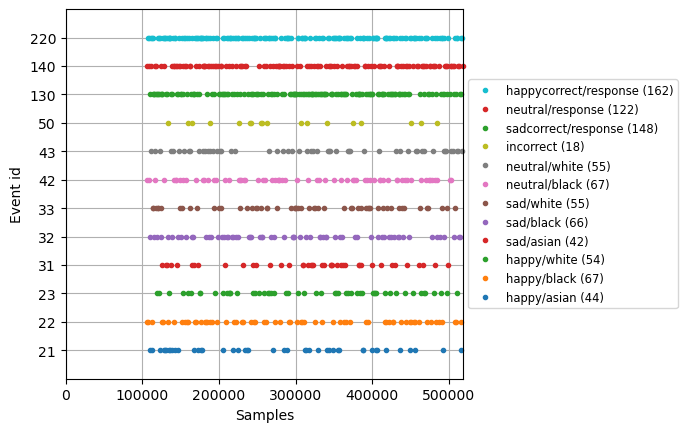

/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_36005/2660861167.py:7: RuntimeWarning: event 54 missing from event_id will be ignored
  mne.viz.plot_events(events2, event_id=event_id2, on_missing='warn', first_samp=raw2.first_samp, sfreq=sfreq)
/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_36005/2660861167.py:7: RuntimeWarning: event 58 missing from event_id will be ignored
  mne.viz.plot_events(events2, event_id=event_id2, on_missing='warn', first_samp=raw2.first_samp, sfreq=sfreq)
/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_36005/2660861167.py:7: RuntimeWarning: event 62 missing from event_id will be ignored
  mne.viz.plot_events(events2, event_id=event_id2, on_missing='warn', first_samp=raw2.first_samp, sfreq=sfreq)
/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_36005/2660861167.py:7: RuntimeWarning: event 150 missing from event_id will be ignored
  mne.viz.plot_events(events2, event_id=event_id2, on_missing='warn', first_samp=raw2.

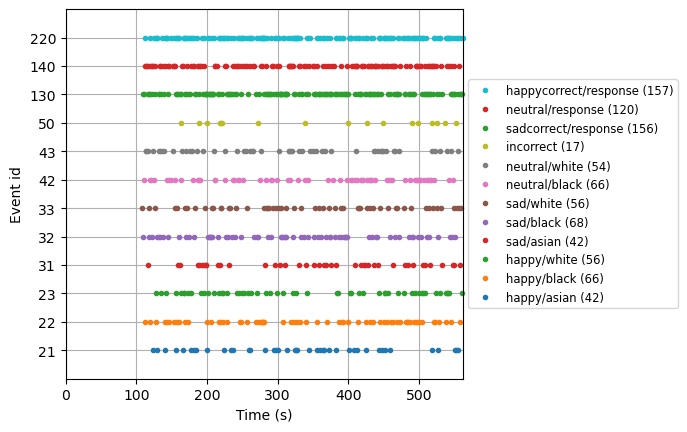

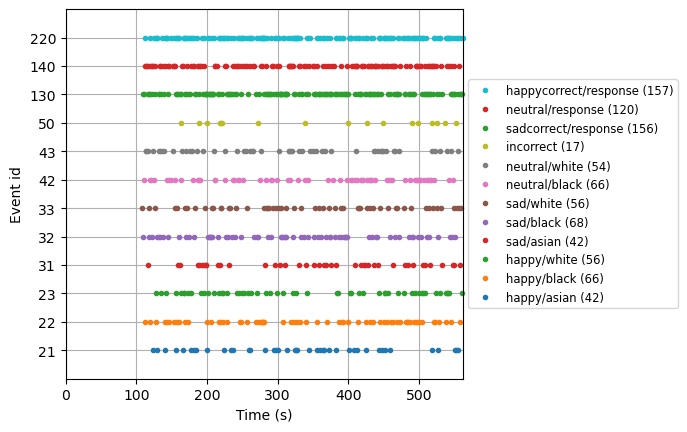

In [44]:
# visualise events

mne.viz.plot_events(events, event_id=event_id, on_missing='warn'); 
# Set sfreq from raw object
sfreq = raw2.info['sfreq']
# Plot events with sfreq and first_samp
mne.viz.plot_events(events2, event_id=event_id2, on_missing='warn', first_samp=raw2.first_samp, sfreq=sfreq);


In [ ]:
# visualize events  
raw.first_samp = 100000

mne.viz.plot_events(events, event_id=event_id, on_missing='warn'); 
mne.viz.plot_events(events2, event_id=event_id2, on_missing='warn', show_first_sam); 

SyntaxError: positional argument follows keyword argument (1249095251.py, line 5)

In [15]:
# for ERPs
tmin, tmax = -0.1, 0.8  # in s

epochs1 = mne.Epochs(
    raw,
    events=events, # using the updated events-timestamps
    event_id=event_id,
    tmin=tmin,
    tmax=tmax,
    verbose=False,
)

epochs2 = mne.Epochs(
    raw2,
    events=events2, # using the updated events-timestamps
    event_id=event_id2,
    tmin=tmin,
    tmax=tmax,
    verbose=False,
)

## Subsetting 

In [18]:
# For the first 
nw_1 = epochs1['neutral/white']
nb_1 = epochs1['neutral/black']
sw_1 = epochs1['sad/white']
sb_1 = epochs1['sad/black']
hw_1 = epochs1['happy/white']
hb_1 = epochs1['happy/black']

# general emotions
happy_1 = epochs1['happy/black', 'happy/white']
sad_1 = epochs1['sad/black', 'sad/white']
neutral_1 = epochs1['neutral/black', 'neutral/white']
# general ethnicities
black_1 = epochs1['happy/black', 'sad/black', 'sad/neutral']
white_1 = epochs1['happy/white', 'sad/white', 'sad/white']


## and the second 
nw_2 = epochs2['neutral/white']
nb_2 = epochs2['neutral/black']
sw_2 = epochs2['sad/white']
sb_2 = epochs2['sad/black']
hw_2 = epochs2['happy/white']
hb_2 = epochs2['happy/black']

# general emotions
happy_2 = epochs2['happy/black', 'happy/white']
sad_2 = epochs2['sad/black', 'sad/white']
neutral_2 = epochs2['neutral/black', 'neutral/white']
# general ethnicities
black_2 = epochs2['happy/black', 'sad/black', 'sad/neutral']
white_2 = epochs2['happy/white', 'sad/white', 'sad/white']

## Plotting epochs

Using data from preloaded Raw for 900 events and 901 original time points ...
0 bad epochs dropped
Not setting metadata
900 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


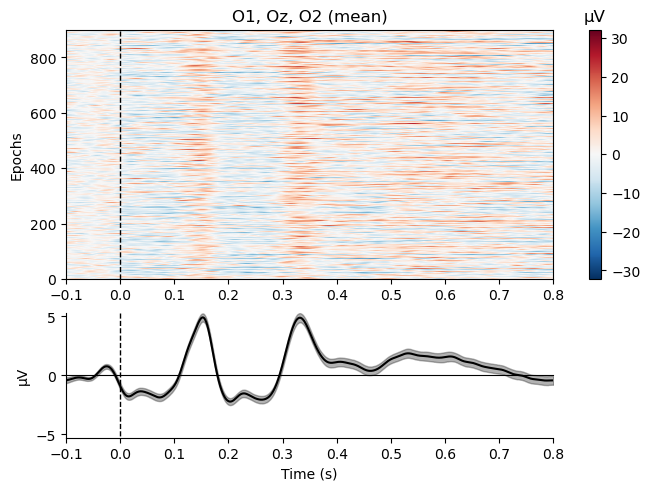

Using data from preloaded Raw for 900 events and 901 original time points ...
0 bad epochs dropped
Not setting metadata
900 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


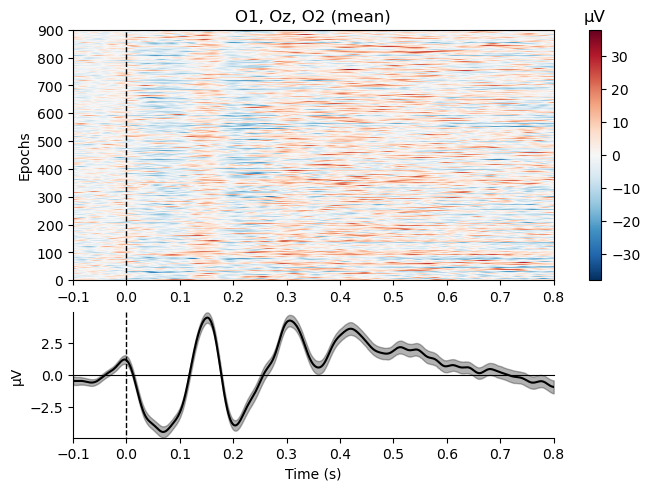

In [19]:
# plotting from channels over occipital cortex (looking for P1-N1-P2)
picks = ['O1','Oz','O2']
epochs1.plot_image(picks=picks, combine='mean');
# same for the others
epochs2.plot_image(picks=picks, combine='mean');


Using data from preloaded Raw for 67 events and 901 original time points ...


0 bad epochs dropped
Not setting metadata
67 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


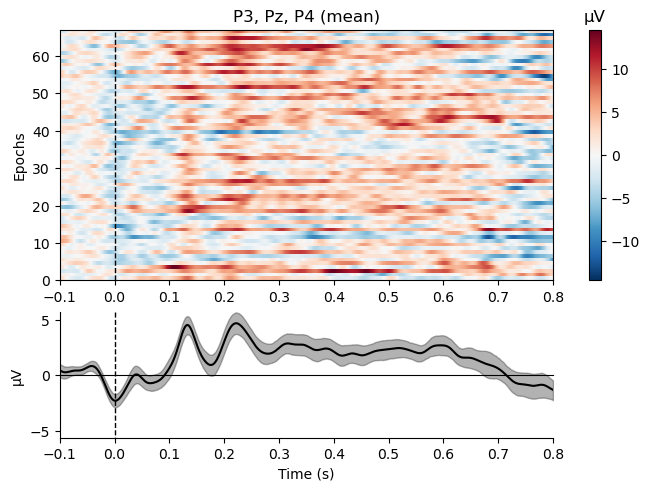

Using data from preloaded Raw for 66 events and 901 original time points ...
0 bad epochs dropped
Not setting metadata
66 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


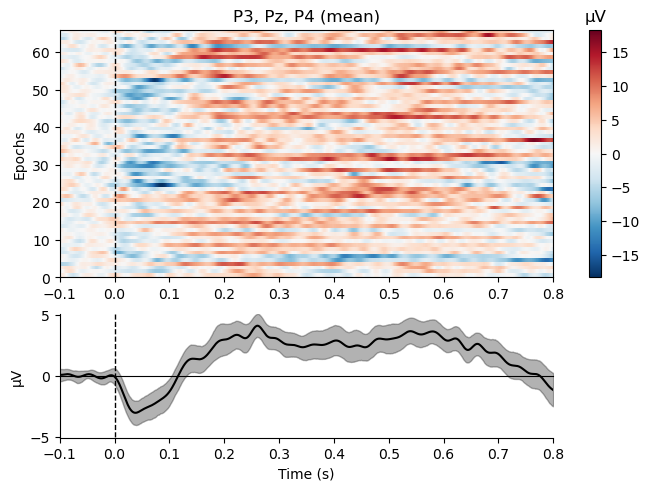

In [20]:
# plotting from channels over parietal cortex (potential P3) - and only the one event type
# just chose on condition as an example (happy black)
picks = ['P3','Pz','P4']
hb_1.plot_image(picks=picks, combine='mean');
# same for the other
hb_2.plot_image(picks=picks, combine='mean');

# Evoked

In [21]:
evoked1 = epochs1.average()
# Create evoked responses for each condition
evoked1_nw = nw_1.average() 
evoked1_nb = nb_1.average() 
evoked1_sw = sw_1.average() 
evoked1_sb = sb_1.average() 
evoked1_hw = hw_1.average() 
evoked1_hb = hb_1.average() 

evoked_happy = happy_1.average()
evoked_sad = sad_1.average() 
evoked_neutral = neutral_1.average()

evoked_black = black_1.average() 
evoked_white = white_1.average() 


# for the second 
evoked2 = epochs2.average()
# Create evoked responses for each condition
evoked2_nw = nw_2.average() 
evoked2_nb = nb_2.average() 
evoked2_sw = sw_2.average() 
evoked2_sb = sb_2.average() 
evoked2_hw = hw_2.average() 
evoked2_hb = hb_2.average() 

evoked2_happy = happy_2.average()
evoked2_sad = sad_2.average() 
evoked2_neutral = neutral_2.average()

evoked2_black = black_2.average() 
evoked2_white = white_2.average() 


No projector specified for this dataset. Please consider the method self.add_proj.


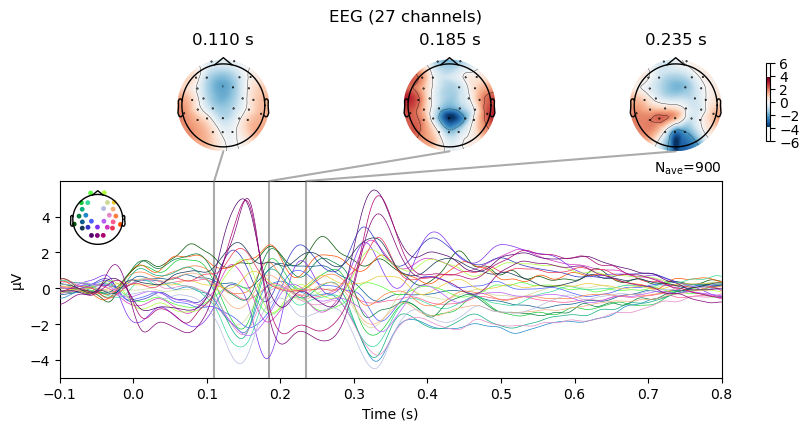

No projector specified for this dataset. Please consider the method self.add_proj.


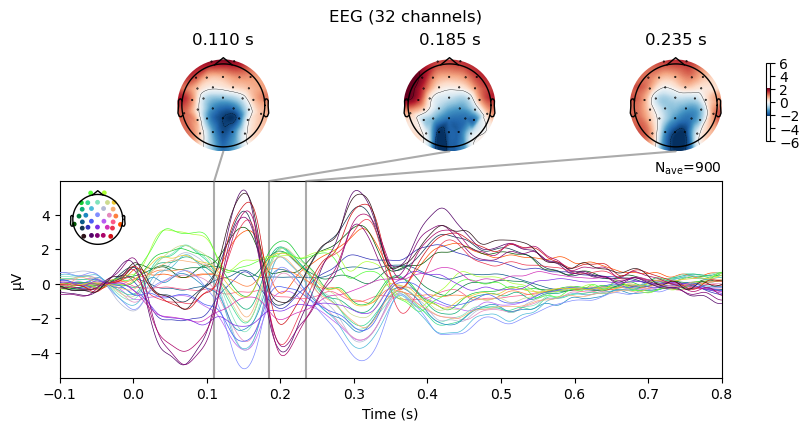

In [22]:

times = [0.11, 0.185, 0.235]

evoked1.plot_joint(times=times);
evoked2.plot_joint(times=times);

# save files

In [25]:
# Save
outpath = os.path.join(os.getcwd(), 'epochs')

if not os.path.exists(outpath):
    os.makedirs(outpath)

epochs1.save(os.path.join(outpath, 'epochs_own_sub1-epo.fif'), overwrite=True)

epochs2.save(os.path.join(outpath, 'epochs_own2_ah-epo.fif'), overwrite=True)


Overwriting existing file.
Using data from preloaded Raw for 1 events and 901 original time points ...
Overwriting existing file.
Using data from preloaded Raw for 900 events and 901 original time points ...
Overwriting existing file.
Using data from preloaded Raw for 1 events and 901 original time points ...
Overwriting existing file.
Using data from preloaded Raw for 900 events and 901 original time points ...
